In [ ]:
import numpy as np
import matplotlib.pyplot as plt

##2.

In [ ]:
sample_cloudy = []
sample_sprinkler = []
sample_rain = []
sample_wet =[]

# Define the conditional probability tables for each node
cloudy_cpt = np.array([0.5, 0.5])
sprinkler_cpt = np.array([[0.5, 0.5], [0.9, 0.1]])
rain_cpt = np.array([[0.8, 0.2], [0.2, 0.8]])
wet_cpt = np.array([[[0.99, 0.01], [0.1, 0.9]], [[0.1, 0.9], [0.01, 0.99]]])

# Initialize the state of each node
cloudy = np.random.choice([0, 1], p=cloudy_cpt)
sprinkler = np.random.choice([0, 1], p=sprinkler_cpt[cloudy])
rain = np.random.choice([0, 1], p=rain_cpt[cloudy])
wet = np.random.choice([0, 1], p=wet_cpt[sprinkler, rain])

# Number of iterations for the Gibbs sampler
num_iterations = 10000

# Gibbs sampling loop
for i in range(num_iterations):
    # Sample the state of each node based on the current state of the other nodes
    cloudy = np.random.choice([0, 1], p=cloudy_cpt)
    sprinkler = np.random.choice([0, 1], p=sprinkler_cpt[cloudy])
    rain = np.random.choice([0, 1], p=rain_cpt[cloudy])
    wet = np.random.choice([0, 1], p=wet_cpt[sprinkler, rain])
    sample_cloudy.append(cloudy)
    sample_sprinkler.append(sprinkler)
    sample_rain.append(rain)
    sample_wet.append(wet)

In [ ]:
conditional_probability = [x for x, y in zip(sample_wet, sample_sprinkler) if y == 1]
final_sample = []
for sample in range(100):
  if(conditional_probability[sample]==1 and sample_cloudy[sample]==1 and sample_rain[sample]==1):
    final_sample.append(1)
  else:
    final_sample.append(0)
print("P(R, C | S = T, W = T) = ",sum(final_sample)/len(final_sample))

P(R, C | S = T, W = T) =  0.35


##3.

In [ ]:
conditional_probability = [x for x, y in zip(sample_wet, sample_sprinkler) if y == 1]
final_sample = []
for sample in range(100):
  if(conditional_probability[sample]==1 and sample_rain[sample]==1):
    final_sample.append(1)
  else:
    final_sample.append(0)
print("P(R = T | S = T, W = T) = ",sum(final_sample)/len(final_sample))

P(R = T | S = T, W = T) =  0.45


##4.


In [ ]:
sample_cloudy = []
sample_sprinkler = []
sample_rain = []
sample_wet =[]

# Define the conditional probability tables for each node
cloudy_cpt = np.array([0.5, 0.5])
sprinkler_cpt = np.array([[0.5, 0.5], [0.9, 0.1]])
rain_cpt = np.array([[0.8, 0.2], [0.2, 0.8]])
wet_cpt = np.array([[[0.99, 0.01], [0.1, 0.9]], [[0.1, 0.9], [0.01, 0.99]]])

# Initialize the state of each node
cloudy = np.random.choice([0, 1], p=cloudy_cpt)
sprinkler = np.random.choice([0, 1], p=sprinkler_cpt[cloudy])
rain = np.random.choice([0, 1], p=rain_cpt[cloudy])
wet = np.random.choice([0, 1], p=wet_cpt[sprinkler, rain])

# Number of iterations for the Gibbs sampler
num_iterations = 500000

# Gibbs sampling loop
for i in range(num_iterations):
    # Sample the state of each node based on the current state of the other nodes
    cloudy = np.random.choice([0, 1], p=cloudy_cpt)
    sprinkler = np.random.choice([0, 1], p=sprinkler_cpt[cloudy])
    rain = np.random.choice([0, 1], p=rain_cpt[cloudy])
    wet = np.random.choice([0, 1], p=wet_cpt[sprinkler, rain])
    sample_cloudy.append(cloudy)
    sample_sprinkler.append(sprinkler)
    sample_rain.append(rain)
    sample_wet.append(wet)

##5.

In [ ]:
def get_relative_freq(sample_list,t):
  relative_freq = []
  for index in range(1,t):
    sublist = sample_list[:index]
    relative_freq.append(sum(sublist)/len(sublist))
  return relative_freq

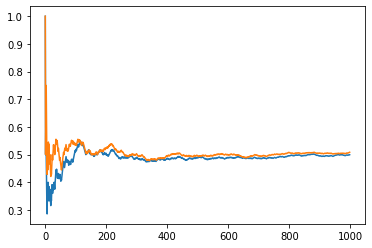

In [ ]:
plt.plot(get_relative_freq(sample_rain,1000))
plt.plot(get_relative_freq(sample_cloudy,1000))

In [ ]:
sample_cloudy = []
sample_sprinkler = []
sample_rain = []
sample_wet =[]

# Define the conditional probability tables for each node
cloudy_cpt = np.array([0.5, 0.5])
sprinkler_cpt = np.array([[0.5, 0.5], [0.9, 0.1]])
rain_cpt = np.array([[0.8, 0.2], [0.2, 0.8]])
wet_cpt = np.array([[[0.99, 0.01], [0.1, 0.9]], [[0.1, 0.9], [0.01, 0.99]]])

# Initialize the state of each node
cloudy = np.random.choice([0, 1], p=cloudy_cpt)
sprinkler = np.random.choice([0, 1], p=sprinkler_cpt[cloudy])
rain = np.random.choice([0, 1], p=rain_cpt[cloudy])
wet = np.random.choice([0, 1], p=wet_cpt[sprinkler, rain])

# Number of iterations for the Gibbs sampler
num_iterations = 500000

# Gibbs sampling loop
for i in range(num_iterations):
    # Sample the state of each node based on the current state of the other nodes
    cloudy = np.random.choice([0, 1], p=cloudy_cpt)
    sprinkler = np.random.choice([0, 1], p=sprinkler_cpt[cloudy])
    rain = np.random.choice([0, 1], p=rain_cpt[cloudy])
    wet = np.random.choice([0, 1], p=wet_cpt[sprinkler, rain])
    sample_cloudy.append(cloudy)
    sample_sprinkler.append(sprinkler)
    sample_rain.append(rain)
    sample_wet.append(wet)

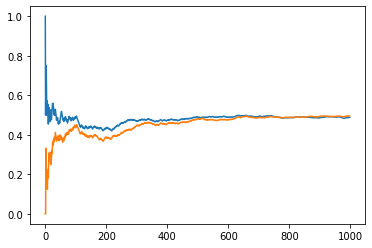

In [ ]:
plt.plot(get_relative_freq(sample_rain,1000))
plt.plot(get_relative_freq(sample_cloudy,1000))

both plots show that the mean value over t, it converges into their expected value, 0.5

##6.

In [ ]:
def get_auto_correlation(sample,k):
  auto_corr = []
  for index in range(len(sample)):
    correlation = 0
    value = sample[index]
    lower = index - k
    upper = index + k
    if(lower<0):
      lower = 0
    if(upper>=len(sample)):
      upper = len(sample)-1
    sublist = sample[lower:upper]
    for item in sublist:
      if(item!=value & value==0):
        correlation+=1/k
      elif(item!=value & value==1):
        correlation-=1/k
    auto_corr.append(correlation)
  return auto_corr
list_corr1 = get_auto_correlation(sample_rain[0:1000],5)
list_corr2 = get_auto_correlation(sample_cloudy[0:1000],5)

(array([ 58., 182., 201.,  39.,  19.,  49.,  95., 234., 112.,  11.]),
 array([-1.6 , -1.26, -0.92, -0.58, -0.24,  0.1 ,  0.44,  0.78,  1.12,
         1.46,  1.8 ]),
 <a list of 10 Patch objects>)

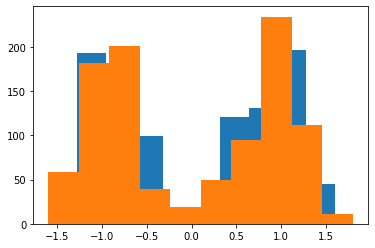

In [ ]:
plt.hist(list_corr1)
plt.hist(list_corr2)

In [ ]:
print("Mean autocorrelation of Rain: ",sum(list_corr1)/len(list_corr1))
print("Mean autocorrelation of Cloudy: ",sum(list_corr2)/len(list_corr2))

Mean autocorrelation of Rain:  0.0006000000000000007
Mean autocorrelation of Cloudy:  0.00020000000000000394


We can see, the mean is positive meaning the auto-correlation of each sample with their 5 neighbors is positive

In [ ]:
mean_auto_corr_rain =[]
mean_auto_corr_cloudy =[]
for i in range(20):
  mean_auto_corr_rain.append(sum(get_auto_correlation(sample_rain[0:1000],i))/len(get_auto_correlation(sample_rain[0:1000],i)))
  mean_auto_corr_cloudy.append(sum(get_auto_correlation(sample_cloudy[0:1000],i))/len(get_auto_correlation(sample_cloudy[0:1000],i)))

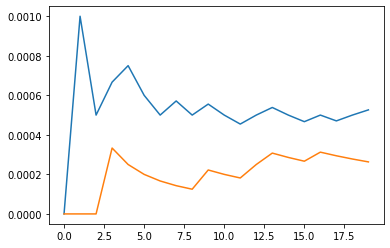

In [ ]:
plt.plot(mean_auto_corr_rain)
plt.plot(mean_auto_corr_cloudy)

The plots of mean correlation over k neighbors sugests that to get independent samples we should sample on a 10 samples interval to get close to independent samples.

##7.

In [ ]:
sample_cloudy = []
sample_sprinkler = []
sample_rain = []
sample_wet =[]

# Define the conditional probability tables for each node
cloudy_cpt = np.array([0.5, 0.5])
sprinkler_cpt = np.array([[0.5, 0.5], [0.9, 0.1]])
rain_cpt = np.array([[0.8, 0.2], [0.2, 0.8]])
wet_cpt = np.array([[[0.99, 0.01], [0.1, 0.9]], [[0.1, 0.9], [0.01, 0.99]]])

# Initialize the state of each node
cloudy = np.random.choice([0, 1], p=cloudy_cpt)
sprinkler = np.random.choice([0, 1], p=sprinkler_cpt[cloudy])
rain = np.random.choice([0, 1], p=rain_cpt[cloudy])
wet = np.random.choice([0, 1], p=wet_cpt[sprinkler, rain])

# Number of iterations for the Gibbs sampler
num_iterations = 10000
burn_in = 1000
thin_out = 10

# Gibbs sampling loop
for i in range(num_iterations):
    # Sample the state of each node based on the current state of the other nodes
    cloudy = np.random.choice([0, 1], p=cloudy_cpt)
    sprinkler = np.random.choice([0, 1], p=sprinkler_cpt[cloudy])
    rain = np.random.choice([0, 1], p=rain_cpt[cloudy])
    wet = np.random.choice([0, 1], p=wet_cpt[sprinkler, rain])
    if(i>=burn_in & i%thin_out==0):
      sample_cloudy.append(cloudy)
      sample_sprinkler.append(sprinkler)
      sample_rain.append(rain)
      sample_wet.append(wet)

##8.

In [ ]:
conditional_probability = [x for x, y in zip(sample_wet, sample_sprinkler) if y == 1]
final_sample = []
for sample in range(100):
  if(conditional_probability[sample]==1 and sample_rain[sample]==1):
    final_sample.append(1)
  else:
    final_sample.append(0)
print("P(R = T | S = T, W = T) = ",sum(final_sample)/len(final_sample))

P(R = T | S = T, W = T) =  0.46


The new probability computed (0.46) is higher than the one without burn-in and thining-out (0.45), but the diference isn't meaningfull.

##9.

By computing analiticly the probability of P(R = T | S = T, W = T) = 0.439 (proof in pdf) so for the small sample size of 100, the gibbs sampler with thining-out and burn-in performed worse than the vanila in terms of guessing the ground truth.

In [ ]:
#Experiment for larger sample size
sample_cloudy = []
sample_sprinkler = []
sample_rain = []
sample_wet =[]

# Define the conditional probability tables for each node
cloudy_cpt = np.array([0.5, 0.5])
sprinkler_cpt = np.array([[0.5, 0.5], [0.9, 0.1]])
rain_cpt = np.array([[0.8, 0.2], [0.2, 0.8]])
wet_cpt = np.array([[[0.99, 0.01], [0.1, 0.9]], [[0.1, 0.9], [0.01, 0.99]]])

# Initialize the state of each node
cloudy = np.random.choice([0, 1], p=cloudy_cpt)
sprinkler = np.random.choice([0, 1], p=sprinkler_cpt[cloudy])
rain = np.random.choice([0, 1], p=rain_cpt[cloudy])
wet = np.random.choice([0, 1], p=wet_cpt[sprinkler, rain])

# Number of iterations for the Gibbs sampler
num_iterations = 10000

# Gibbs sampling loop
for i in range(num_iterations):
    # Sample the state of each node based on the current state of the other nodes
    cloudy = np.random.choice([0, 1], p=cloudy_cpt)
    sprinkler = np.random.choice([0, 1], p=sprinkler_cpt[cloudy])
    rain = np.random.choice([0, 1], p=rain_cpt[cloudy])
    wet = np.random.choice([0, 1], p=wet_cpt[sprinkler, rain])
    sample_cloudy.append(cloudy)
    sample_sprinkler.append(sprinkler)
    sample_rain.append(rain)
    sample_wet.append(wet)

conditional_probability = [x for x, y in zip(sample_wet, sample_sprinkler) if y == 1]
final_sample = []
for sample in range(1000):
  if(conditional_probability[sample]==1 and sample_rain[sample]==1):
    final_sample.append(1)
  else:
    final_sample.append(0)
print("Vanila:",sum(final_sample)/len(final_sample))

sample_cloudy = []
sample_sprinkler = []
sample_rain = []
sample_wet =[]

# Define the conditional probability tables for each node
cloudy_cpt = np.array([0.5, 0.5])
sprinkler_cpt = np.array([[0.5, 0.5], [0.9, 0.1]])
rain_cpt = np.array([[0.8, 0.2], [0.2, 0.8]])
wet_cpt = np.array([[[0.99, 0.01], [0.1, 0.9]], [[0.1, 0.9], [0.01, 0.99]]])

# Initialize the state of each node
cloudy = np.random.choice([0, 1], p=cloudy_cpt)
sprinkler = np.random.choice([0, 1], p=sprinkler_cpt[cloudy])
rain = np.random.choice([0, 1], p=rain_cpt[cloudy])
wet = np.random.choice([0, 1], p=wet_cpt[sprinkler, rain])

# Number of iterations for the Gibbs sampler
num_iterations = 10000
burn_in = 1000
thin_out = 10

# Gibbs sampling loop
for i in range(num_iterations):
    # Sample the state of each node based on the current state of the other nodes
    cloudy = np.random.choice([0, 1], p=cloudy_cpt)
    sprinkler = np.random.choice([0, 1], p=sprinkler_cpt[cloudy])
    rain = np.random.choice([0, 1], p=rain_cpt[cloudy])
    wet = np.random.choice([0, 1], p=wet_cpt[sprinkler, rain])
    if(i>=burn_in & i%thin_out==0):
      sample_cloudy.append(cloudy)
      sample_sprinkler.append(sprinkler)
      sample_rain.append(rain)
      sample_wet.append(wet)

conditional_probability = [x for x, y in zip(sample_wet, sample_sprinkler) if y == 1]
final_sample = []
for sample in range(1000):
  if(conditional_probability[sample]==1 and sample_rain[sample]==1):
    final_sample.append(1)
  else:
    final_sample.append(0)
print("Burn-in and thining-out:",sum(final_sample)/len(final_sample))

Vanila: 0.476
Burn-in and thining-out: 0.455


We can now apreciate the benefits of performing burn-in and thining-out since the probability computed is closer to the ground truth

##Extra.


In [ ]:
def sample_chain(num_iterations,burn_in,thin_out):
  sample_cloudy = []
  sample_sprinkler = []
  sample_rain = []
  sample_wet =[]

  # Define the conditional probability tables for each node
  cloudy_cpt = np.array([0.5, 0.5])
  sprinkler_cpt = np.array([[0.5, 0.5], [0.9, 0.1]])
  rain_cpt = np.array([[0.8, 0.2], [0.2, 0.8]])
  wet_cpt = np.array([[[0.99, 0.01], [0.1, 0.9]], [[0.1, 0.9], [0.01, 0.99]]])

  # Initialize the state of each node
  cloudy = np.random.choice([0, 1], p=cloudy_cpt)
  sprinkler = np.random.choice([0, 1], p=sprinkler_cpt[cloudy])
  rain = np.random.choice([0, 1], p=rain_cpt[cloudy])
  wet = np.random.choice([0, 1], p=wet_cpt[sprinkler, rain])

  # Gibbs sampling loop
  for i in range(num_iterations):
      # Sample the state of each node based on the current state of the other nodes
      cloudy = np.random.choice([0, 1], p=cloudy_cpt)
      sprinkler = np.random.choice([0, 1], p=sprinkler_cpt[cloudy])
      rain = np.random.choice([0, 1], p=rain_cpt[cloudy])
      wet = np.random.choice([0, 1], p=wet_cpt[sprinkler, rain])
      if(i>=burn_in & i%thin_out==0):
        sample_cloudy.append(cloudy)
        sample_sprinkler.append(sprinkler)
        sample_rain.append(rain)
        sample_wet.append(wet)
  sample_size = len(sample_cloudy)
  return(sample_cloudy,sample_sprinkler,sample_rain,sample_wet,sample_size)

In [ ]:
chains = 10
niter = 10000
means = []
variances = []
for i in range(chains):
  _,_,_,sample_wet,nsamples = sample_chain(niter,1000,10)
  means.append(np.mean(sample_wet))
  variances.append(np.var(sample_wet))

# Calculate the within-chain variance and the between-chain variance
W = np.mean(variances, axis=0)
B = np.mean(means, axis=0)

# Calculate the pooled estimate of the variance
V = W*(nsamples-1)/nsamples + B*nsamples/(nsamples-1)

# Calculate the potential scale reduction factor (PSRF)
R = np.sqrt(V/W)
print("PSRF: ",R)
if (R < 1.1):
    print("Chains have converged.")
else:
    print("Chains have not yet converged.")

PSRF:  1.965842711326772
Chains have not yet converged.


Using my gibbs sampler with thining out and burn it, I was unable to make it pass the Gelman and Rubin test, this means that the samples collected from the different chains are not yet representative of the true posterior distribution.